In [35]:
import import_files as MrtRecommendationDependencies
from ridership_transformer import RidershipTransformer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import database
from database import TrainUpdate
from datetime import datetime
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [8]:
ridership_df = pd.read_csv(MrtRecommendationDependencies.get_dataset_path("cubao_transformed.csv"), parse_dates=['datetime'], index_col="datetime")

In [9]:
ridership_df['day_of_week'] = ridership_df.apply(lambda x: x.name.weekday(),axis=1)
ridership_df['hour_of_day'] = ridership_df.apply(lambda x: x.name.hour,axis=1)

In [10]:
ridership_df.head()

,entry,exit,day_of_week,hour_of_day
datetime,,,,
2019-01-01 04:00:00,0,0,1,4
2019-01-01 05:00:00,0,0,1,5
2019-01-01 06:00:00,239,22,1,6
2019-01-01 07:00:00,413,525,1,7
2019-01-01 08:00:00,454,627,1,8


In [14]:
average_ridership = pd.DataFrame(data=ridership_df.groupby(['day_of_week', 'hour_of_day'])['entry'].mean())

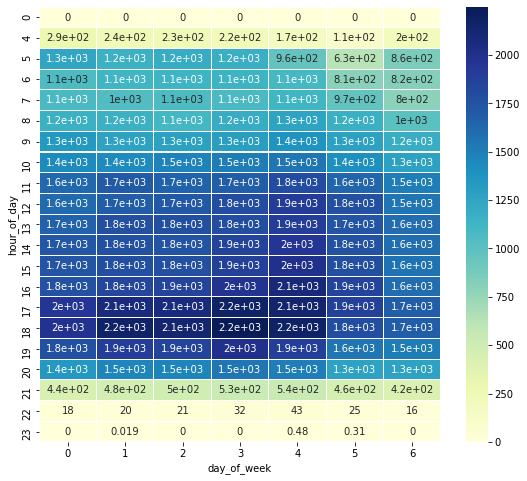

In [26]:
entry_pivot = pd.pivot_table(ridership_df, index="hour_of_day", columns="day_of_week", values="entry", aggfunc=np.mean)
entry_pivot.fillna(0, inplace=True)
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(entry_pivot, ax = ax, cmap ="YlGnBu", linewidths = 0.1,annot=True) 

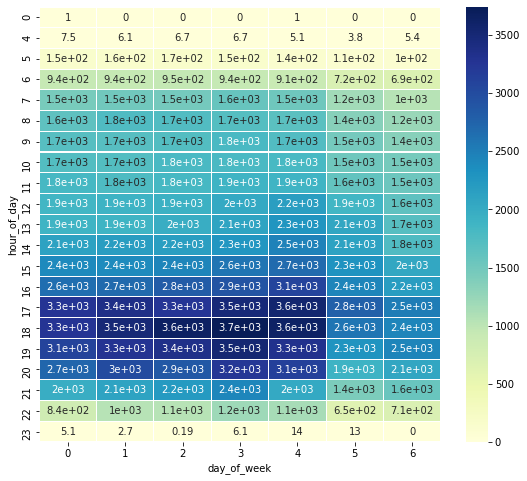

In [27]:
exit_pivot = pd.pivot_table(ridership_df, index="hour_of_day", columns="day_of_week", values="exit", aggfunc=np.mean)
exit_pivot.fillna(0, inplace=True)
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(exit_pivot, ax = ax, cmap ="YlGnBu", linewidths = 0.1,annot=True) 

In [49]:
wednesday = ridership_df[ridership_df.day_of_week == 4]
pca = PCA(n_components=2)
pca_data = pca.fit_transform(wednesday)

In [50]:
pca_df = pd.DataFrame(pca_data,columns=["PCA1", "PCA2"])

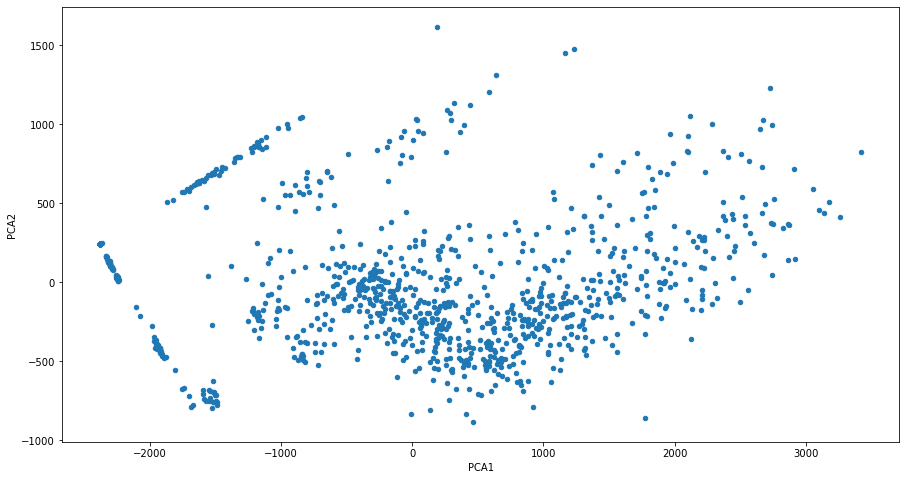

In [51]:
pca_df.plot(x='PCA1', y='PCA2', kind="scatter", figsize=(15,8))

In [52]:
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=1)
kmeans.fit(pca_df)

KMeans(max_iter=1000, n_clusters=3, random_state=1)

In [53]:
pca_classified = pca_df.copy()
pca_classified['label'] =  kmeans.labels_

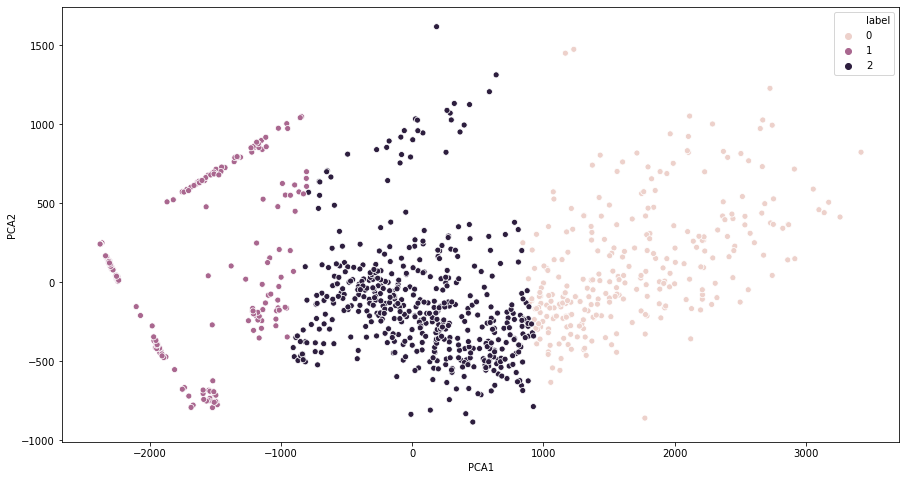

In [54]:
fig, ax = plt.subplots(figsize=(15,8))

sns.scatterplot(ax = ax, x=pca_classified.PCA1, y=pca_classified.PCA2, hue=pca_classified.label)

In [58]:
wednesday_with_labels = pca_classified.join(wednesday.reset_index())

In [60]:
wednesday_with_labels[wednesday_with_labels.label == 0].head(40)

,PCA1,PCA2,label,datetime,entry,exit,day_of_week,hour_of_day
12,1781.366529,70.250080,0,2019-01-04 16:00:00,2183,3550,4,16
13,2459.856262,229.672090,0,2019-01-04 17:00:00,2375,4220,4,17
14,2866.250639,367.556888,0,2019-01-04 18:00:00,2453,4642,4,18
15,2366.862330,420.574698,0,2019-01-04 19:00:00,2163,4232,4,19
30,1305.660736,-292.000727,0,2019-01-11 14:00:00,2267,2958,4,14
31,1340.317071,-179.813667,0,2019-01-11 15:00:00,2186,3043,4,15
32,1318.438683,-345.562609,0,2019-01-11 16:00:00,2320,2943,4,16
33,2863.668139,142.695492,0,2019-01-11 17:00:00,2648,4530,4,17
34,2212.138853,-105.894344,0,2019-01-11 18:00:00,2547,3840,4,18
35,2537.523204,418.618402,0,2019-01-11 19:00:00,2248,4380,4,19
